In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
dataset_path = 'chineseMNIST.csv'

# Load data into a DataFrame
chinese_mnist_df = pd.read_csv(dataset_path)

# Extract features (X) and labels (y)
X = chinese_mnist_df.drop('character',axis=1)
X = X.drop('label',axis=1).to_numpy()
y = chinese_mnist_df['label'].to_numpy()

label_mapping = {
    0:0,
    1:1,
    2:2,
    3:3,
    4:4,
    5:5,
    6:6,
    7:7,
    8:8,
    9:9,
    10:10,
    100:11,
    1000:12,
    10000:13,
    100000000:14
}
y1 = [label_mapping[label] for label in y]
y1 = np.array(y1)

X_train, X_temp, y1_train, y1_temp = train_test_split(X, y1, test_size=0.3, random_state=42)
X_val, X_test, y1_val, y1_test = train_test_split(X_temp, y1_temp, test_size=0.5, random_state=42)



In [3]:
model=Sequential([tf.keras.Input(shape=(4096,)),
                  tf.keras.layers.Dense(500,activation="relu",  kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                  tf.keras.layers.Dense(300,activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                  tf.keras.layers.Dense(175,activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                  tf.keras.layers.Dense(100,activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                  tf.keras.layers.Dense(55,activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                  tf.keras.layers.Dense(30,activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
                  tf.keras.layers.Dense(15,activation="linear", kernel_regularizer=tf.keras.regularizers.l2(0.01))
                 ])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               2048500   
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 175)               52675     
                                                                 
 dense_3 (Dense)             (None, 100)               17600     
                                                                 
 dense_4 (Dense)             (None, 55)                5555      
                                                                 
 dense_5 (Dense)             (None, 30)                1680      
                                                                 
 dense_6 (Dense)             (None, 15)                4

In [5]:
model.compile(
   loss= tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

In [6]:
model.fit(
    X_train,y1_train,
    epochs=20
)

Epoch 1/20
329/329 [==============================] - 14s 40ms/step - loss: 9.1700
Epoch 2/20
329/329 [==============================] - 13s 40ms/step - loss: 3.8058
Epoch 3/20
329/329 [==============================] - 13s 40ms/step - loss: 2.4590
Epoch 4/20
329/329 [==============================] - 13s 40ms/step - loss: 1.9905
Epoch 5/20
329/329 [==============================] - 13s 40ms/step - loss: 1.7609
Epoch 6/20
329/329 [==============================] - 13s 40ms/step - loss: 1.5865
Epoch 7/20
329/329 [==============================] - 13s 40ms/step - loss: 1.4886
Epoch 8/20
329/329 [==============================] - 13s 40ms/step - loss: 1.4109
Epoch 9/20
329/329 [==============================] - 13s 40ms/step - loss: 1.3359
Epoch 10/20
329/329 [==============================] - 13s 40ms/step - loss: 1.2905
Epoch 11/20
329/329 [==============================] - 13s 40ms/step - loss: 1.2513
Epoch 12/20
329/329 [==============================] - 13s 40ms/step - loss: 1.2271
E

In [7]:

def widgvis(fig):
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False

def display_digit(X):
    """ display a single digit. The input is one digit (400,). """
    fig, ax = plt.subplots(1,1, figsize=(0.5,0.5))
    widgvis(fig)
    X_reshaped = X.reshape((64,64)).T
    # Display the image
    ax.imshow(X_reshaped, cmap='gray')
    plt.show()


In [8]:
reverse_mapping = {v: k for k, v in label_mapping.items()}

# Reverse the mapping from y1 to y
y_test_l = [reverse_mapping[label] for label in y1_test]

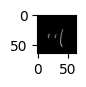

1/1 [==============================] - 0s 88ms/step
 predicting a Two: 
[[ -9.3191      -8.596995     6.1408362   10.651344     0.77762216
   10.096519     1.3703947    2.7960095   -5.175945    -0.15233025
  -11.282624     1.550388     0.63761     -6.83116      2.3930457 ]]
 Largest Prediction index: 3
 predicting a Two. Probability vector: 
[[1.3384637e-09 2.7555735e-09 6.9306078e-03 6.3046372e-01 3.2475593e-05
  3.6199516e-01 5.8748250e-05 2.4441708e-04 8.4324846e-08 1.2813974e-05
  1.8787069e-10 7.0333976e-05 2.8232591e-05 1.6110356e-08 1.6335276e-04]]
Total of predictions: 1.000
np.argmax(prediction_p): 3


In [9]:
image_of_two = X_train[5476]
display_digit(image_of_two)

prediction = model.predict(image_of_two.reshape(1,4096))  # prediction

print(f" predicting a Two: \n{prediction}")
print(f" Largest Prediction index: {np.argmax(prediction)}")

prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")
yhat = np.argmax(prediction_p)
print(f"np.argmax(prediction_p): {yhat}")

1/1 [==============================] - 0s 18ms/step


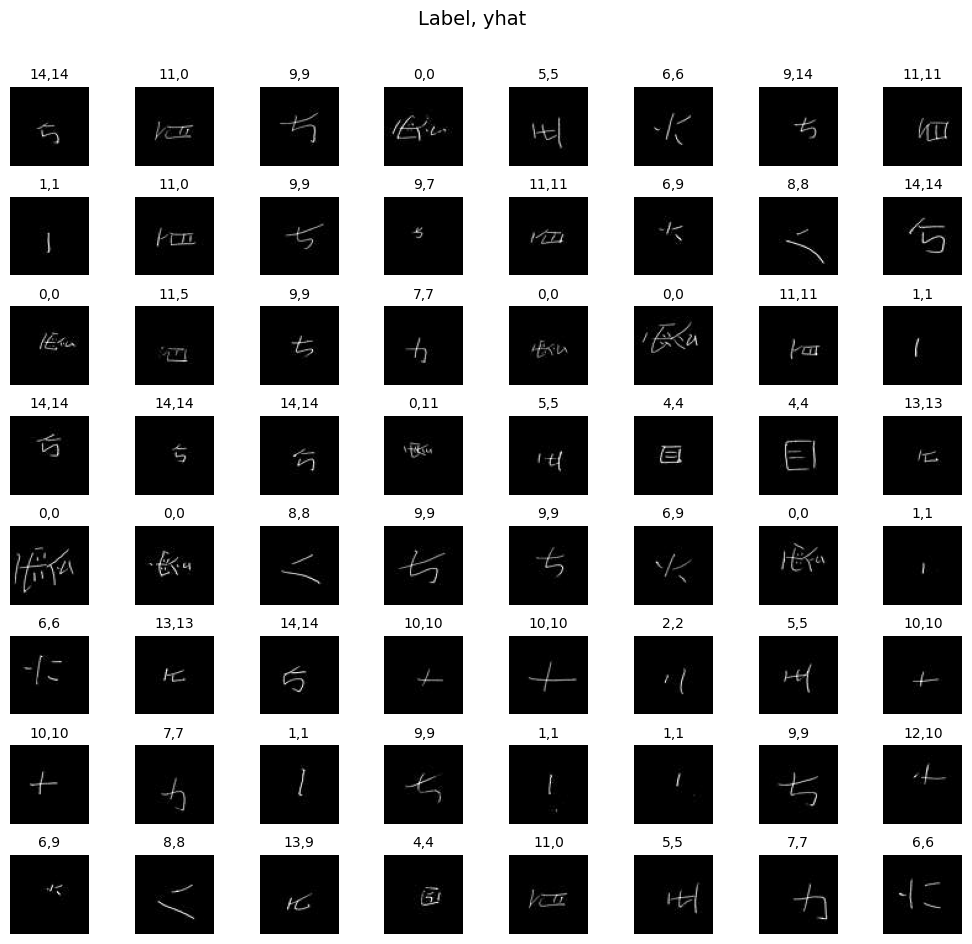

In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X_val.shape

fig, axes = plt.subplots(8,8, figsize=(10,10))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_val[random_index].reshape((64,64)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X_val[random_index].reshape(1,4096))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y1_val[random_index]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()

In [11]:
# Step 4: Calculate the loss
validation_loss = model.evaluate(X_val, y1_val, verbose=0)

# The validation_loss variable now contains the loss value
print("Validation Loss:", validation_loss)


Validation Loss: 1.3859518766403198


1/1 [==============================] - 0s 18ms/step


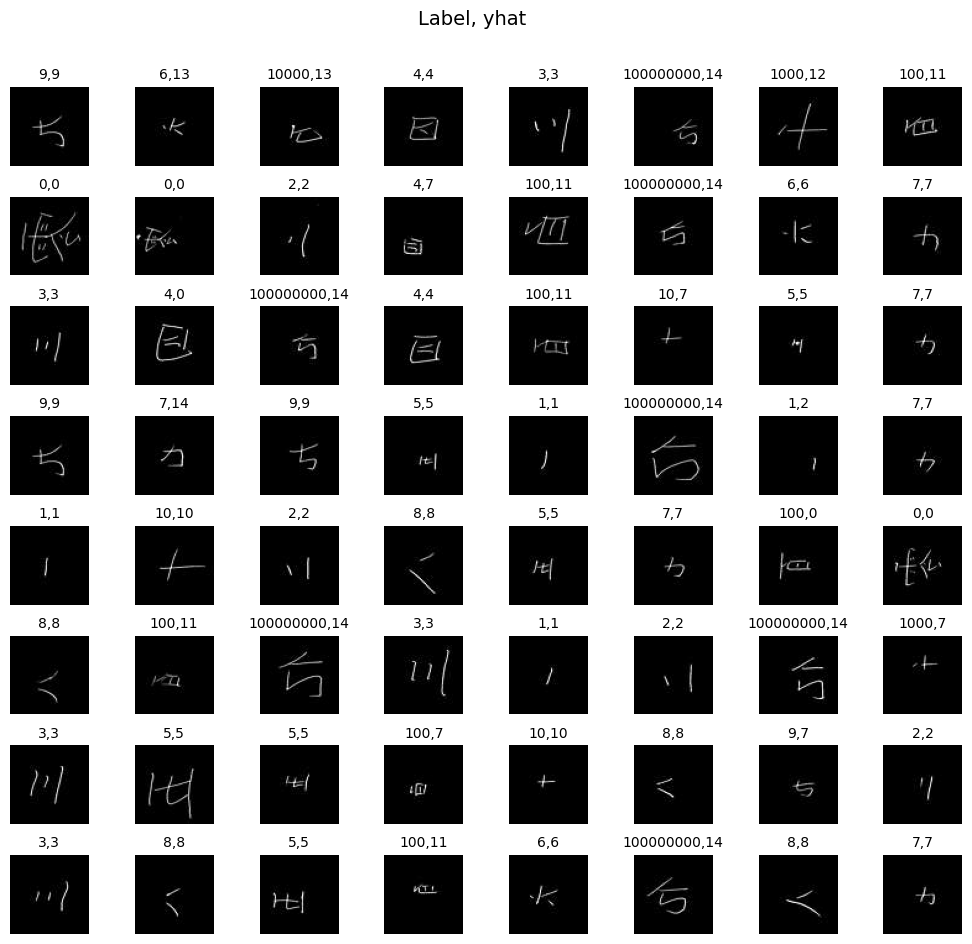

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X_test.shape

fig, axes = plt.subplots(8,8, figsize=(10,10))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X_test[random_index].reshape((64,64)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X_test[random_index].reshape(1,4096))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y_test_l[random_index]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()


In [16]:
# Step 4: Calculate the loss
validation_loss = model.evaluate(X_test, y1_test, verbose=0)

# The validation_loss variable now contains the loss value
print("Test Loss:", validation_loss)

Test Loss: 1.3414093255996704
